In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import math

# Mean Spec Z for the SOM cells

In [2]:
cat = Table.read('/home/aalvarez/Work/Data/PV/Calib/meanspecz.fits')

In [3]:
# Add index of the cell from the BIAS_ID column
cat['x'] = np.round(cat['BIAS_ID']/10000).astype(int)
cat['y'] = cat['BIAS_ID'] - 10000*np.round(cat['BIAS_ID']/10000).astype(int)

In [4]:
# Display the size of the SUM
size_x = np.max(cat['x']) + 1
size_y = np.max(cat['y']) + 1
print('The SOM is defined on a grid of '+str(size_x)+' x '+str(size_y)+' cells')

The SOM is defined on a grid of 75 x 150 cells


In [5]:
print("Empty Cells' number: "+str(np.sum(cat['SPEC_Z']<0)))
print("Filled Cells' number: "+str(np.sum(cat['SPEC_Z']>=0)))
print("Filled ratio: "+str(int(np.round(100*np.sum(cat['SPEC_Z']>=0)/len(cat['SPEC_Z']))))+" %")

Empty Cells' number: 2485
Filled Cells' number: 8765
Filled ratio: 78 %


In [6]:
cat['SPEC_Z_NAN']=cat['SPEC_Z']/(cat['SPEC_Z']>=0)

/tmp/ipykernel_58048/3220065623.py:1: RuntimeWarning: divide by zero encountered in divide
  cat['SPEC_Z_NAN']=cat['SPEC_Z']/(cat['SPEC_Z']>=0)


In [7]:
plt.rcParams["figure.figsize"]=15,15

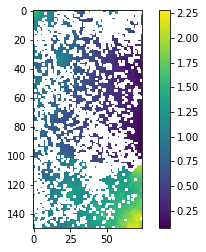

In [8]:
fig=plt.figure()
z = cat['SPEC_Z_NAN'].reshape(size_y,size_x)

plt.imshow(z)                              
plt.colorbar()

In [9]:
z_min = 0.1
z_max = 2.2
bin_num = 10

In [10]:
def computeBin(z):
    if z<z_min or z>=z_max:
        return -99
    id_bin = int(math.floor(bin_num*(z-z_min)/(z_max-z_min)))
   
    return id_bin

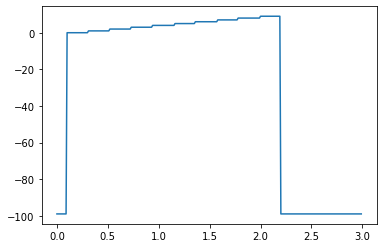

In [11]:
z_test=np.array(range(300))/100.
z_index = [ computeBin(z) for z in z_test]
plt.plot(z_test, z_index)

In [12]:
z_index = np.array([computeBin(z) for z in cat['SPEC_Z_NAN']])
z_index=z_index/(z_index>=0)

/tmp/ipykernel_58048/2316565856.py:2: RuntimeWarning: divide by zero encountered in divide
  z_index=z_index/(z_index>=0)


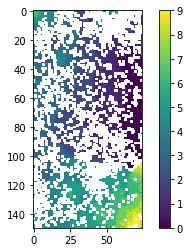

In [13]:
fig=plt.figure()
z = z_index.reshape(size_y,size_x)

plt.imshow(z)                              
plt.colorbar()

In [14]:
cat['BIN_ID']=z_index
cat['SOM_CELL_ID']=cat['BIAS_ID']

In [15]:
cat.colnames

['BIAS_ID',
 'SPEC_Z',
 'OBJECT_NUMBER',
 'x',
 'y',
 'SPEC_Z_NAN',
 'BIN_ID',
 'SOM_CELL_ID']